In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import uniform
import math
import seaborn as sns

from scipy.optimize import minimize
from scipy.fftpack import dct, idct
from cosamp_fn import cosamp
np.random.seed(123)

'''
Exercise 3.2
This example will explore geometry and sampling probabilities in high
dimensional spaces.

(a) Consider a two dimensional square dart board with length L=2
on both sides, and a circle of radius R = 1 in the middle. Write a program to
throw 10,000 darts by generating a uniform random x and y position on the square.
Compute the radius for each point and compute what fraction land inside the circle
(i.e. how many have radius <1). Is this consistent with your expectation based on
area of the circle and the square?

(b) Repeat this experiment, throwsing 10,000 darts randomly (sampled from a uniform
distribution) on an N-dimensional cube (length L = 2) with an N-dimensional sphere
inside (radius R = 1), for N = 2 through N = 10. For a given N, what fraction
'''



'\nExercise 3.2\nThis example will explore geometry and sampling probabilities in high\ndimensional spaces.\n\n(a) Consider a two dimensional square dart board with length L=2\non both sides, and a circle of radius R = 1 in the middle. Write a program to\nthrow 10,000 darts by generating a uniform random x and y position on the square.\nCompute the radius for each point and compute what fraction land inside the circle\n(i.e. how many have radius <1). Is this consistent with your expectation based on\narea of the circle and the square?\n\n(b) Repeat this experiment, throwsing 10,000 darts randomly (sampled from a uniform\ndistribution) on an N-dimensional cube (length L = 2) with an N-dimensional sphere\ninside (radius R = 1), for N = 2 through N = 10. For a given N, what fraction\n'

fraction inside the circle is 78.99000000000001 %


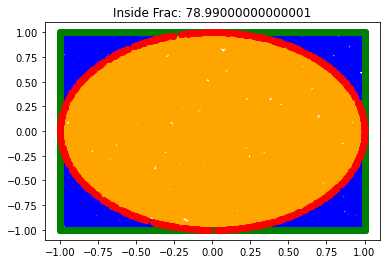

This makes sense considering how much area the circle covers in a square (2D case). I would expect majority to overlap.


In [6]:
def generate_square(x_cen, y_cen, n, L=2.0):
    s = L/2.0
    X = np.linspace(x_cen-s, x_cen+s, n)

    X1,X2 = np.meshgrid(X,np.array([-1.0,1.0]))
    X = np.concatenate((X1, X2), axis = 0)
    Y = np.concatenate((X2, X1), axis = 0)

    return X, Y

def generate_circle(n, r=1.0):
    two_pi = 2.0 * np.pi
    theta = np.random.uniform(0, 2*np.pi, (n,1))
    #np.linspace(0, two_pi, n)[:-1][None,:]
    x = r*np.cos(theta)
    y = r*np.sin(theta)

    return x,y

samp_max = 1.0
samp_min = -1.0
NN = 10000

#Generating square and circle data to plot
xc,yc = generate_circle(600,1.0)
xs,ys = generate_square(0.0,0.0, 500)

'''dart_x = np.random.uniform(samp_min, samp_max, N)
dart_y = np.random.uniform(samp_min, samp_max, N)
darts = np.array([dar_x, dar_y])'''

darts = np.zeros((2,NN))
darts[0,:] = np.random.uniform(samp_min, samp_max, NN)
darts[1,:] = np.random.uniform(samp_min, samp_max, NN)
#rads = np.zeros((NN,1))
rads = np.zeros((NN,))
rr = np.sqrt(np.sum(darts**2, axis=0))

inside = []
outside = []
within = 0
cc=0
import time

for val in rr:
    if val <= 1.0:
        within+=1
        inside.append(darts[:,cc])
        #print(darts[:,cc])
        #time.sleep(1.0)
    else:
        outside.append(darts[:,cc])
    cc+=1

inside = np.array(inside)
outside = np.array(outside)

print('fraction inside the circle is '+str((within/NN)*100)+' %')

'''
plt.figure()
plt.scatter(xs,ys,color='green')
plt.scatter(xc,yc,color='red')
plt.scatter(inside[0,:],inside[1,:],color='purple',s=17.0,label='inside')
plt.scatter(outside[0,:],outside[1,:],color='blue',s=17.0,label='outside')
plt.title('Inside Frac: '+str(within/NN))
plt.legend()
plt.show()'''

plt.figure()
cc=0
for val in rr:
    if val <= 1.0:
        plt.scatter(darts[0,cc],darts[1,cc],color='orange')
    else:
        plt.scatter(darts[0,cc],darts[1,cc],color='blue')
    cc+=1
#plt.scatter(inside[0,:],inside[1,:],color='orange',label='inside')
#plt.scatter(outside[0,:],outside[1,:],color='blue',label='outside')
plt.scatter(xs,ys,color='green')
plt.scatter(xc,yc,color='red')
plt.title('Inside Frac: '+str(100*(within/NN)))
plt.show()

print('This makes sense considering how much area the circle covers in a square (2D case). I would expect majority to overlap.')


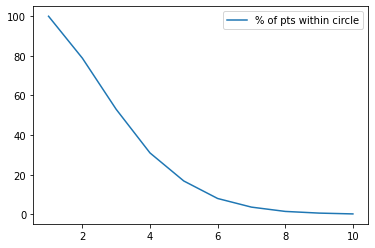

/Users/german/opt/anaconda3/envs/snake/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/german/opt/anaconda3/envs/snake/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/german/opt/anaconda3/envs/snake/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error 

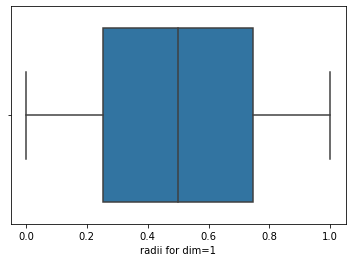

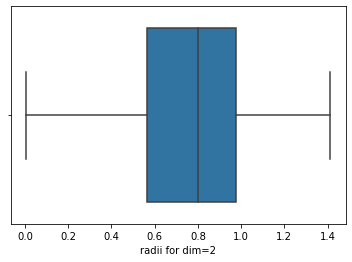

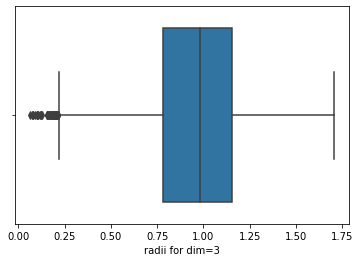

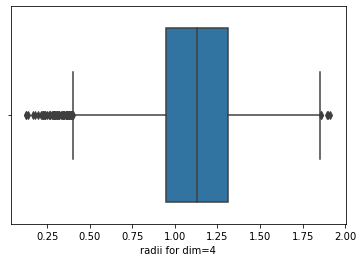

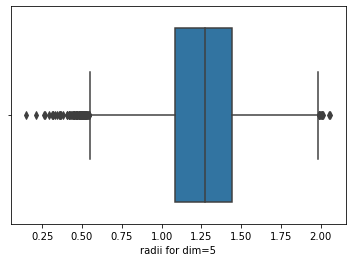

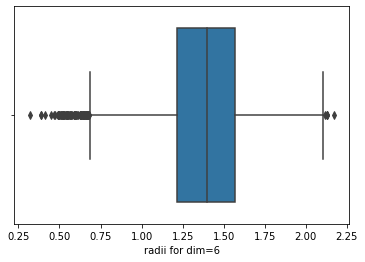

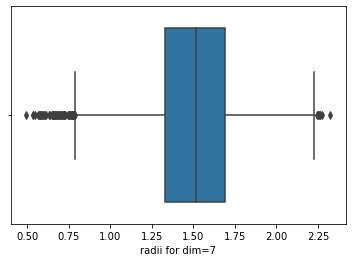

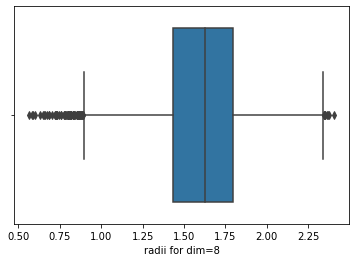

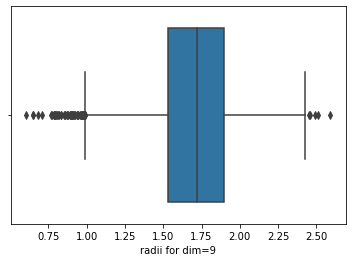

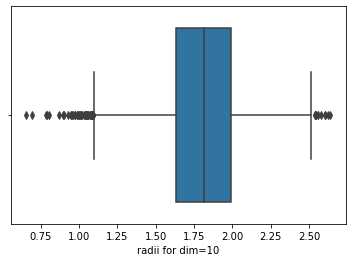

In [11]:
'''
(b) Repeat this experiment, throwsing 10,000 darts randomly (sampled from a uniform
distribution) on an N-dimensional cube (length L = 2) with an N-dimensional sphere
inside (radius R = 1), for N = 2 through N = 10. For a given N, what fraction of the
the points land inside the sphere. Plot this fraction versus N and plot these.
Also compute the histogram of the radii of the randomly sample points for each N,
plot these. What trends do you notice.
'''

'''
(b) Repeat this experiment, throwsing 10,000 darts randomly (sampled from a uniform
distribution) on an N-dimensional cube (length L = 2) with an N-dimensional sphere
inside (radius R = 1), for N = 2 through N = 10. For a given N, what fraction of the
the points land inside the sphere. Plot this fraction versus N and plot these.
Also compute the histogram of the radii of the randomly sample points for each N,
plot these. What trends do you notice.
'''
NN=10000
dim = 10
x = []
radiis = []
perc = []

#Generating samples
for k in range(dim):
    samples = uniform(-1,2).rvs(NN)
    x.append(samples)

    temp = np.array(x)
    r = np.sqrt(np.sum(temp**2,axis=0))
    circle = (r <= 1)
    square = (r > 1)
    perc.append((np.sum(circle)/NN)*100)
    radiis.append(r)

x = np.array(x)
perc = np.array(perc)
#radiis = np.array(radiis)
xs = np.arange(dim)+1


plt.figure()
plt.plot(xs,perc,label='% of pts within circle')
plt.legend()
plt.show()

#fig, axs = plt.subplots(ncols=dim)

for i in range(dim):
    plt.figure()
    sns.boxplot(radiis[i]).set(xlabel='radii for dim='+str(i+1))
plt.show()



In [12]:
'''
Exercise 3.3

This exercise will explore the relationship between the sparsity K, the signal
size n, and the number of samples p in compressed sensing

- For n=1000, and K=5, create a K-sparse vectors of Fourier coefficients in a
Fourier basis Psi.
- For each p from 1 to 100, create a Gaussian random sampling matrix
C in R^{pxn} to create a measurement vector y = C P_si s.
Use compressed sensing based on this measurement to estimate s_hat.
For each p, repeat this with at least 10 realization of the random measurement matrix C.
- Plot the average relative error ||s_hat - s||_2 / ||s||_2 versus p; it may be
helpful to visualize the errors with a box-and-whisker plot. Explain the trends.
Also plot the average l_1, l_0 error versus p.
- Repeat the above experiment for K =1 through K = 20. What are the changes?
- Now repeat the above experiment for K = 5, varying the signal size using n=100,
n=500, n=1000, n=2000, and n=5000
'''
def L1_norm(x):
    return np.linalg.norm(x,ord=1)

def run_compressed_sensing(s, Psi, P, n):
    L2_errors = np.zeros((P,10))
    L1_errors = np.zeros((P,10))
    L0_errors = np.zeros((P,10))

    for p in range(P):

        for i in range(0,10):
            C = np.random.normal(loc=0.0, scale=1.0, size=(p+1,n))
            Theta = C @ Psi #np.real(Psi)
            y = Theta @ s

            #constr = ({'type': 'eq', 'fun': lambda x: Theta @ x - y})
            #x0 = np.real(np.linalg.pinv(Theta) @ y)
            #res1 = minimize(L1_norm, x0, method = 'SLSQP', constraints=constr)
            #s_L1 = res1.x
            s_hat = cosamp(Theta, y, 10, epsilon=1.e-10, max_iter=10) # CS via matching pursuit

            #s_hat = idct(s)
            L2_errors[p,i] = np.linalg.norm(s_hat - s, ord=2)/ np.linalg.norm(s, ord=2)
            L1_errors[p,i] = np.linalg.norm(s_hat - s, ord=1)/ np.linalg.norm(s, ord=1)
            L0_errors[p,i] = np.linalg.norm(s_hat - s, ord=0)/ np.linalg.norm(s, ord=0)

    return L2_errors, L1_errors, L0_errors

def create_ksparse(K,Psi,n):
    #Creating fourier coefficients matrix that will be k sparse (composed of only K basis vectors)
    s = np.zeros((n,))
    kindx = np.random.permutation(n)[:K]
    #print(kindx)
    s[kindx] = 1.0
    x = Psi @ s #np.real(Psi) @ s # X
    s = Psi @ x#np.linalg.inv(Psi)@x
    return s


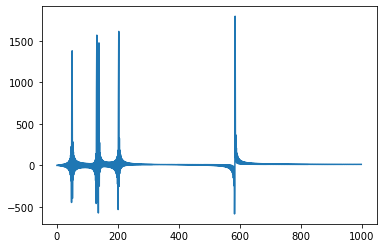

Iteration 81
 .....
(100,)
(100,)


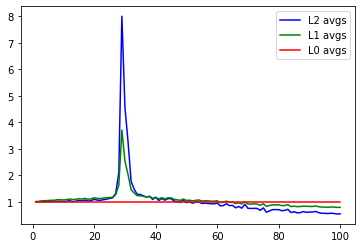

In [5]:
n=1000
K=5
P = 100
#Generate basis Psi
Psi = dct(np.eye(n)) #np.fft.fft(np.eye(n)) #dft matrix
s = create_ksparse(K,Psi,n)

p_list = list(range(0, P))
p_list = np.array(p_list)+1

plt.figure()
plt.plot(s)
plt.show()


L2_errors, L1_errors, L0_errors = run_compressed_sensing(s, Psi, P, n)

L2_avg = np.mean(L2_errors, axis=-1)
L1_avg = np.mean(L1_errors, axis=-1)
L0_avg = np.mean(L0_errors, axis=-1)

#p_list = list(range(1, P))
#p_list = np.array(p_list)

print('\n .....')
print(p_list.shape)
print(L2_avg.shape)

plt.figure()
plt.plot(p_list, L2_avg, color='b', label='L2 avgs')
plt.plot(p_list, L1_avg, color='g', label='L1 avgs')
plt.plot(p_list, L0_avg, color='r', label='L0 avgs')
plt.legend()
plt.show()

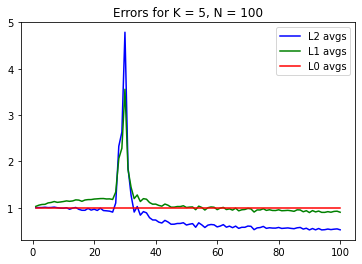

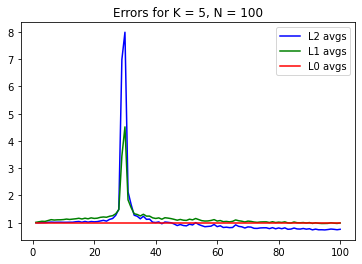

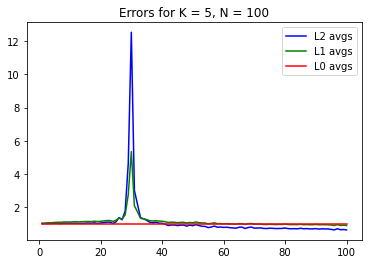

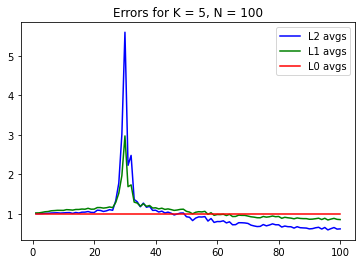

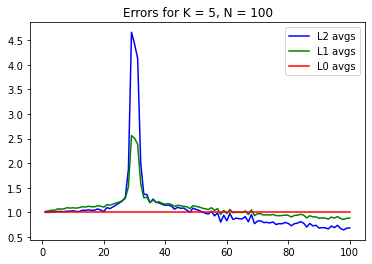

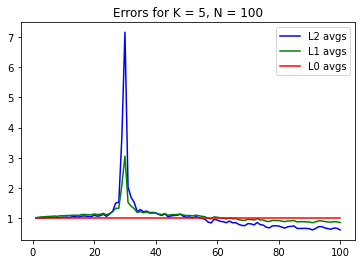

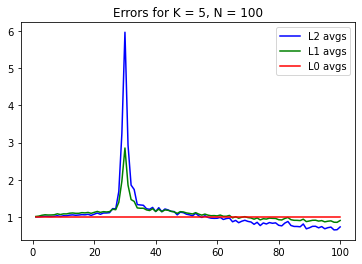

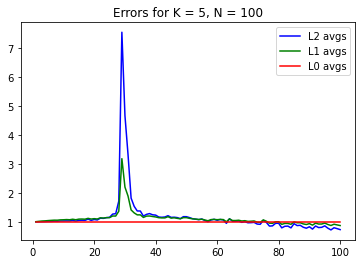

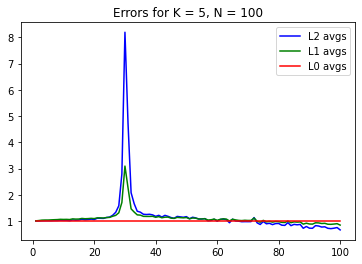

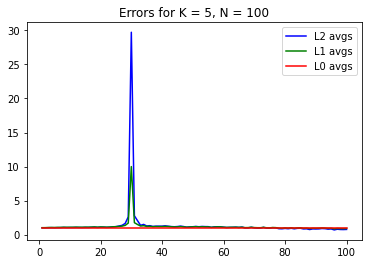

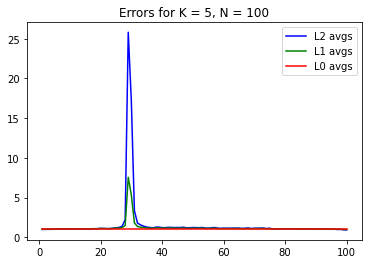

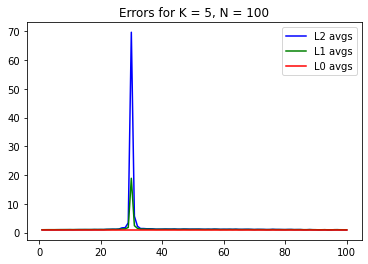

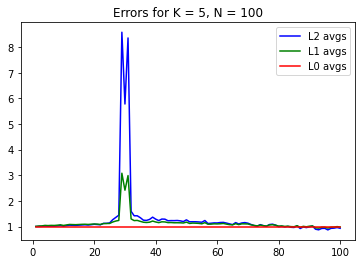

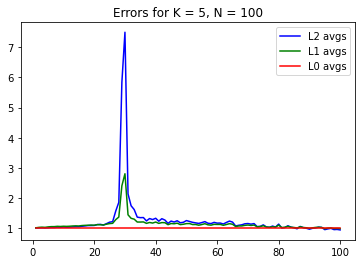

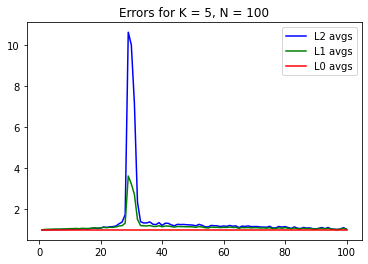

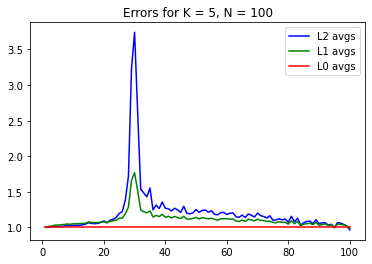

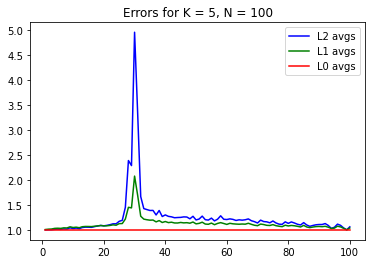

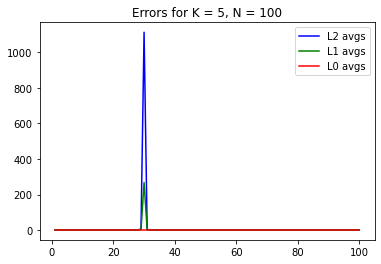

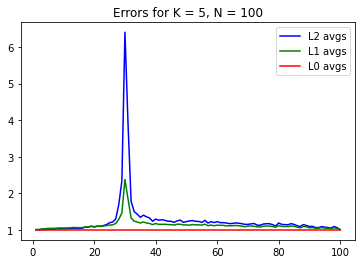

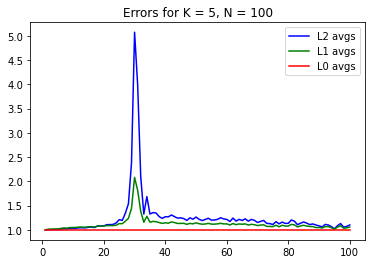

In [8]:

for k in range(20):
    s = create_ksparse(k+1,Psi,n)

    L2_errors, L1_errors, L0_errors = run_compressed_sensing(s, Psi, P, n)

    L2_avg = np.mean(L2_errors, axis=-1)
    L1_avg = np.mean(L1_errors, axis=-1)
    L0_avg = np.mean(L0_errors, axis=-1)

    p_list = list(range(0, P))
    p_list = np.array(p_list)+1


    plt.figure()
    plt.plot(p_list, L2_avg,color='b', label='L2 avgs')
    plt.plot(p_list, L1_avg,color='g', label='L1 avgs')
    plt.plot(p_list, L0_avg,color='r', label='L0 avgs')
    plt.title('Errors for K = ' +str(K)+', N = '+ str(nn))
    plt.legend()
    plt.show()




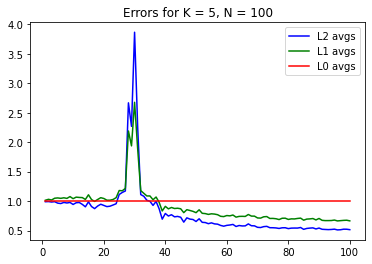

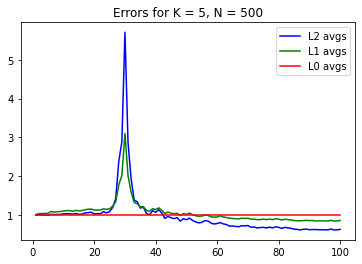

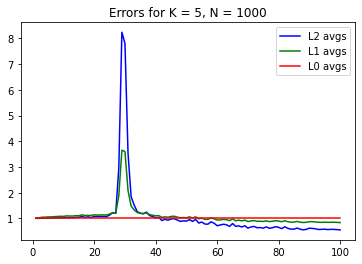

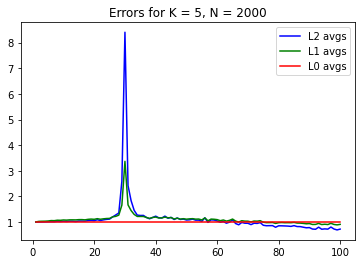

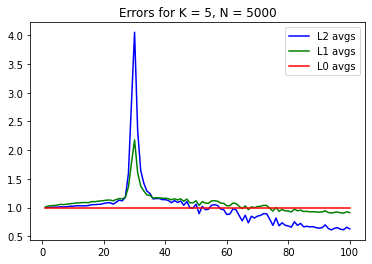

In [14]:
K=5
for nn in [100, 500, 1000, 2000, 5000]:
    Psi = dct(np.eye(nn)) #np.fft.fft(np.eye(n)) #dft matrix
    s = create_ksparse(K,Psi,nn)

    L2_errors, L1_errors, L0_errors = run_compressed_sensing(s, Psi, P, nn)

    L2_avg = np.mean(L2_errors, axis=-1)
    L1_avg = np.mean(L1_errors, axis=-1)
    L0_avg = np.mean(L0_errors, axis=-1)

    p_list = list(range(0, P))
    p_list = np.array(p_list)+1


    plt.figure()
    plt.plot(p_list, L2_avg,color='b', label='L2 avgs')
    plt.plot(p_list, L1_avg,color='g', label='L1 avgs')
    plt.plot(p_list, L0_avg,color='r', label='L0 avgs')
    plt.title('Errors for K = ' +str(K)+', N = '+ str(nn))
    plt.legend()